In [696]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [697]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the file as dataframe


In [698]:
diabetes= pd.read_csv('pima-indians-diabetes.csv')

The above data is trying to predict the outcome of whether a person is diabetic as a function of the other 8 parameters

There are total 8 independent variable which are all continous and Outcome is target variable.
Outcome is a categorical variable and rest all are continous variable in the dataset.

In [699]:
diabetes.describe(include = "all").transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are six variables that has minimum value as '0' and out of these variables only 'Pregnancies' variable
could take a 'zero' value.  The other 'zero' values can be taken as  missing values as they are not practical values

Insulin and Skin Thickness parameters has both min and Q1 value as '0' and it suggests that these two parameters has maximum missing values

Checking the info of the dataset for null values and the size of the dataframe

In [700]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataframe has 768 rows and 9 columns, with 06 parameters as intergers and 02 as floating point values.  Both integers 
and floating values are of 64 bit

Visualization of data before data refining

In [701]:
diabetes.columns = ['Pregnancies','Glucose','BloodPressure',
                     'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [702]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F0D3F2898>,
      dtype=object)

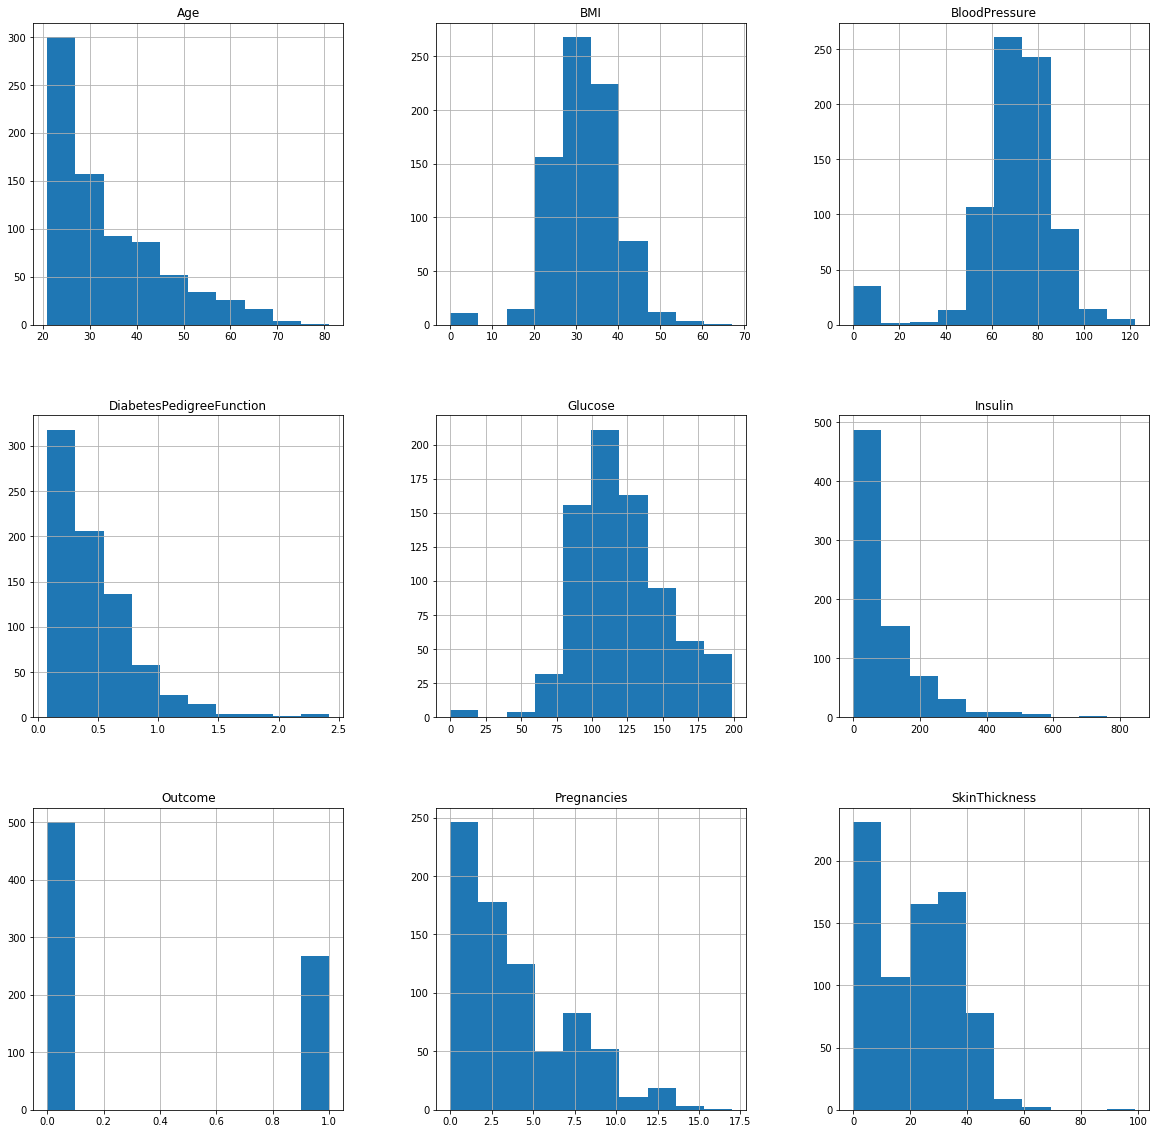

In [703]:
diabetes.hist(figsize = (20,20))

The above histograms of the different parameters depicts that age, insulin and diabetespedigreefunction parameters
are left skewed and 6 parameters having minimum value as 'zero'

In [704]:
#We find that there are '0' values in the dataset which can be missing data.  Before replacing this missing values 
#copy the dataframe and then make the required changes

pimadiabetes = diabetes.copy(deep = True)
pimadiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [705]:
pimadiabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


There are no null values in the dataset and the dataset has 768 rows and 9 columns.  

The 'zero' values can be refined in following ways

- remove the rows with 'zero' values 
- replace the 'zero' values with the population mean/median
- replace the 'zero' values with the population mean/median  according to the outcome 

As there are many zero's in the dataset, it is not advisable to remove the rows and as mean is sensitive to outliers replacing with median is selected

The '0' minimum value for 'Glucose','BMI','SkinThickness','BloodPressure','Insulin' values seems to be impractical. 
Hence, let us replace these values with Null Values first and after that replace with median value.  Median value is choosen as it is not sensitive to outliers present in the dataset

The final outcome depends on the value of 'zero' that we replace and it is better to take the median according to the final outcome i.e., calculate the median of non-diabetic outcome and diabetic outcome separately and replace 0's with these respective medians

1. BLOOD PRESSURE

In [706]:
pimadiabetes[pimadiabetes['BloodPressure'] == 0].shape[0]

35

In [707]:
pimadiabetes[pimadiabetes['BloodPressure'] == 0].index.tolist()
pimadiabetes[pimadiabetes['BloodPressure'] == 0].groupby('Outcome')['BloodPressure'].count()

Outcome
0    19
1    16
Name: BloodPressure, dtype: int64

There are 35 zero values for Blood pressure which can be replaced with median values, out of which 19 are non-diabetic and 16 are diabetic 

In [708]:
# Replacing '0' values with null values for column Glucose
pimadiabetes['BloodPressure'].replace(0,np.NaN,inplace = True)


In [709]:
# The median value calculation of Glucose grouped by outcome 

pimadiabetes_bp = pimadiabetes[pimadiabetes['BloodPressure'].notnull()]
pimadiabetes_bp = pimadiabetes_bp[['BloodPressure','Outcome']].groupby('Outcome')['BloodPressure'].median().reset_index()
pimadiabetes_bp                               
    

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


Median for '0' Outcome is 70 and '1' Outcome is 74.5

In [710]:
# Replacing the zero values of glucose with the corresponding median values of outcomes as calculated
pimadiabetes.loc[(pimadiabetes['BloodPressure'].isnull()) & (pimadiabetes['Outcome'] == 0),'BloodPressure'] = pimadiabetes_bp['BloodPressure'][0]
pimadiabetes.loc[(pimadiabetes['BloodPressure'].isnull()) & (pimadiabetes['Outcome'] == 1),'BloodPressure'] = pimadiabetes_bp['BloodPressure'][1]

In [711]:
pimadiabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
5,5,116,74.0,0,0,25.6,0.201,30,0
6,3,78,50.0,32,88,31.0,0.248,26,1
7,10,115,70.0,0,0,35.3,0.134,29,0
8,2,197,70.0,45,543,30.5,0.158,53,1
9,8,125,96.0,0,0,0.0,0.232,54,1


In [712]:
# checking for replacement of all '0' values
pimadiabetes[pimadiabetes['BloodPressure'] == 0].shape[0]

0

All zero values of 'BloodPressure' replaced

2. GLUCOSE

In [713]:
#zero values to be replaced
pimadiabetes[pimadiabetes['Glucose'] == 0].shape[0]



5

In [714]:
pimadiabetes[pimadiabetes['Glucose'] == 0].index.tolist()

[75, 182, 342, 349, 502]

In [715]:
pimadiabetes[pimadiabetes['Glucose'] == 0].groupby('Outcome')['Glucose'].count()

Outcome
0    3
1    2
Name: Glucose, dtype: int64

There are only 5 zero values for the Glucose attribute, out of which 3 are for non-diabetic and 2 for diabetic

In [716]:
# Replacing '0' values with null values
pimadiabetes['Glucose'].replace(0,np.NaN,inplace = True)

In [717]:
# Calculation of median values grouped according to outcome
pimadiabetes_gl = pimadiabetes[pimadiabetes['Glucose'].notnull()]
pimadiabetes_gl = pimadiabetes_gl[['Glucose','Outcome']].groupby('Outcome').median()
pimadiabetes_gl


,Glucose
Outcome,
0,107.0
1,140.0


Median for '0' Outcome is 107 and '1' Outcome is 140

In [718]:
pimadiabetes.loc[(pimadiabetes['Glucose'].isnull()) & (pimadiabetes['Outcome'] == 0),'Glucose'] = pimadiabetes_gl['Glucose'][0]
pimadiabetes.loc[(pimadiabetes['Glucose'].isnull()) & (pimadiabetes['Outcome'] == 1),'Glucose'] = pimadiabetes_gl['Glucose'][1]


In [719]:
# checking for replacement of all '0' values
pimadiabetes[pimadiabetes['Glucose'] == 0].shape[0]

0

All the zero values of 'Glucose' are replaced

3. BMI

In [720]:
# Selection of data to refine for BMI
pimadiabetes[pimadiabetes['BMI'] == 0].shape[0]

11

In [721]:
pimadiabetes[pimadiabetes['BMI'] == 0].index.tolist()

[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706]

In [722]:
pimadiabetes[pimadiabetes['BMI'] == 0].groupby('Outcome')['BMI'].count()

Outcome
0    9
1    2
Name: BMI, dtype: int64

There are 11 zero values to be replaced with median values and 9 are for non-diabetic and 2 for diabetic

In [723]:
# Replacing zero values by NaN values
pimadiabetes['BMI'].replace(0,np.NaN,inplace = True)


In [724]:
# Calculating median of the BMI according to outcome
pimadiabetes_bmi = pimadiabetes[pimadiabetes['BMI'].notnull()]
pimadiabetes_bmi = pimadiabetes_bmi[['BMI','Outcome']].groupby('Outcome').median().reset_index()
pimadiabetes_bmi

,Outcome,BMI
0,0,30.1
1,1,34.3


Median for '0' Outcome is 30.1 and '1' Outcome is 34.3

In [725]:
# Replacing the Null Values with corresponding median values
pimadiabetes.loc[(pimadiabetes['Outcome'] == 0) & (pimadiabetes['BMI'].isnull()),'BMI'] = pimadiabetes_bmi['BMI'][0]
pimadiabetes.loc[(pimadiabetes['Outcome'] == 1) & (pimadiabetes['BMI'].isnull()),'BMI'] = pimadiabetes_bmi['BMI'][1]
pimadiabetes.head (10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
5,5,116.0,74.0,0,0,25.6,0.201,30,0
6,3,78.0,50.0,32,88,31.0,0.248,26,1
7,10,115.0,70.0,0,0,35.3,0.134,29,0
8,2,197.0,70.0,45,543,30.5,0.158,53,1
9,8,125.0,96.0,0,0,34.3,0.232,54,1


In [726]:
# checking for replacement of all '0' values
pimadiabetes[pimadiabetes['BMI'] == 0].shape[0]

0

All zero values of 'BMI' are replaced

4. INSULIN

In [727]:
# CALCULATING NUMBER OF ZERO VALUES
pimadiabetes[pimadiabetes['Insulin'] == 0].shape[0]
pimadiabetes[pimadiabetes['Insulin'] == 0].index.tolist()
pimadiabetes[pimadiabetes['Insulin'] == 0].groupby('Outcome')['Insulin'].count()



Outcome
0    236
1    138
Name: Insulin, dtype: int64

There are 374 zero values to be replaced with respective median values and 236 are for non-diabetic and 138 for diabetic

In [728]:
# Replace zero with Null Values
pimadiabetes['Insulin'].replace(0,np.NaN,inplace = True)

In [729]:
# Calculating the median grouped by Outcome
pimadiabetes_ins = pimadiabetes[pimadiabetes['Insulin'].notnull()]
pimadiabetes_ins = pimadiabetes_ins[['Insulin','Outcome']].groupby('Outcome')['Insulin'].median().reset_index()
pimadiabetes_ins

,Outcome,Insulin
0,0,102.5
1,1,169.5


Median for '0' Outcome is 102.5 and '1' Outcome is 169.5

In [730]:
# Replacing Null Values with corresponding median values
pimadiabetes.loc[(pimadiabetes['Outcome'] == 0) & (pimadiabetes['Insulin'].isnull()),'Insulin'] = pimadiabetes_ins['Insulin'][0]
pimadiabetes.loc[(pimadiabetes['Outcome'] == 1) & (pimadiabetes['Insulin'].isnull()),'Insulin'] = pimadiabetes_ins['Insulin'][1]
pimadiabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29,102.5,26.6,0.351,31,0
2,8,183.0,64.0,0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
5,5,116.0,74.0,0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32,88.0,31.0,0.248,26,1
7,10,115.0,70.0,0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45,543.0,30.5,0.158,53,1
9,8,125.0,96.0,0,169.5,34.3,0.232,54,1


In [731]:
# checking for replacement of all '0' values
pimadiabetes[pimadiabetes['Insulin'] == 0].shape[0]

0

All '0's of Insulin values are replaced

5. SKIN THICKNESS DATASET

In [732]:
# Checking zero values to be replaced
pimadiabetes[pimadiabetes['SkinThickness'] == 0].shape[0]
pimadiabetes[pimadiabetes['SkinThickness'] == 0].index.tolist()
pimadiabetes[pimadiabetes['SkinThickness'] == 0].groupby('Outcome')['SkinThickness'].count()

Outcome
0    139
1     88
Name: SkinThickness, dtype: int64

There are 227 zero values to be replaced with median values and 139 are for non-diabetic and 88 for diabetic

In [733]:
# Replacing zero values with null values
pimadiabetes['SkinThickness'].replace(0,np.NaN,inplace = True)

In [734]:
# Calculating the median values grouped by Outcome
pimadiabetes_skin = pimadiabetes[pimadiabetes['SkinThickness'].notnull()]
pimadiabetes_skin = pimadiabetes_skin[['SkinThickness','Outcome']].groupby('Outcome').median().reset_index()
pimadiabetes_skin

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


Median for '0' Outcome is 27 and '1' Outcome is 32

In [735]:
# Replacing the Null Values with the medians calculated
pimadiabetes.loc[(pimadiabetes['Outcome'] == 0) & (pimadiabetes['SkinThickness'].isnull()),'SkinThickness'] = pimadiabetes_skin['SkinThickness'][0]
pimadiabetes.loc[(pimadiabetes['Outcome'] == 1) & (pimadiabetes['SkinThickness'].isnull()),'SkinThickness'] = pimadiabetes_skin['SkinThickness'][1]
pimadiabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [736]:
# checking for replacement of all '0' values
pimadiabetes[pimadiabetes['SkinThickness'] == 0].shape[0]

0

All zero values  of 'SkinThickness' are replaced

In [737]:

pimadiabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [738]:
#Calculating the number of persons who are diabetic at an younger age (<30)
pimadiabetes[pimadiabetes['Age']<30].count()

Pregnancies                 396
Glucose                     396
BloodPressure               396
SkinThickness               396
Insulin                     396
BMI                         396
DiabetesPedigreeFunction    396
Age                         396
Outcome                     396
dtype: int64

In [739]:
pimadiabetes[(pimadiabetes['Age']<30) & (pimadiabetes['Outcome'] == 1)].count()

Pregnancies                 84
Glucose                     84
BloodPressure               84
SkinThickness               84
Insulin                     84
BMI                         84
DiabetesPedigreeFunction    84
Age                         84
Outcome                     84
dtype: int64

Out of 396 persons with age less than 30, 84 Persons are diabetic

In [740]:
# Number of persons who are not diabetic at age > 50
pimadiabetes[pimadiabetes['Age']>50].count()


Pregnancies                 81
Glucose                     81
BloodPressure               81
SkinThickness               81
Insulin                     81
BMI                         81
DiabetesPedigreeFunction    81
Age                         81
Outcome                     81
dtype: int64

In [741]:
pimadiabetes[(pimadiabetes['Age']>50) & (pimadiabetes['Outcome'] == 0)].count()

Pregnancies                 43
Glucose                     43
BloodPressure               43
SkinThickness               43
Insulin                     43
BMI                         43
DiabetesPedigreeFunction    43
Age                         43
Outcome                     43
dtype: int64

More than 50% persons of age greater than 50 are diabetic

# VISUALISATION OF DATA AFTER DATA REFINING

# 1. Univariate analysis of the data

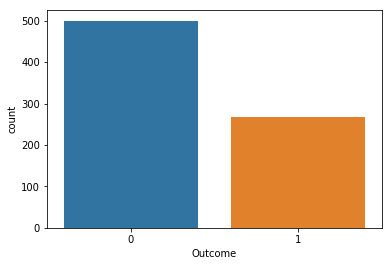

In [742]:
sns.countplot(x = 'Outcome', data = pimadiabetes)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F056E0DD8>,
      dtype=object)

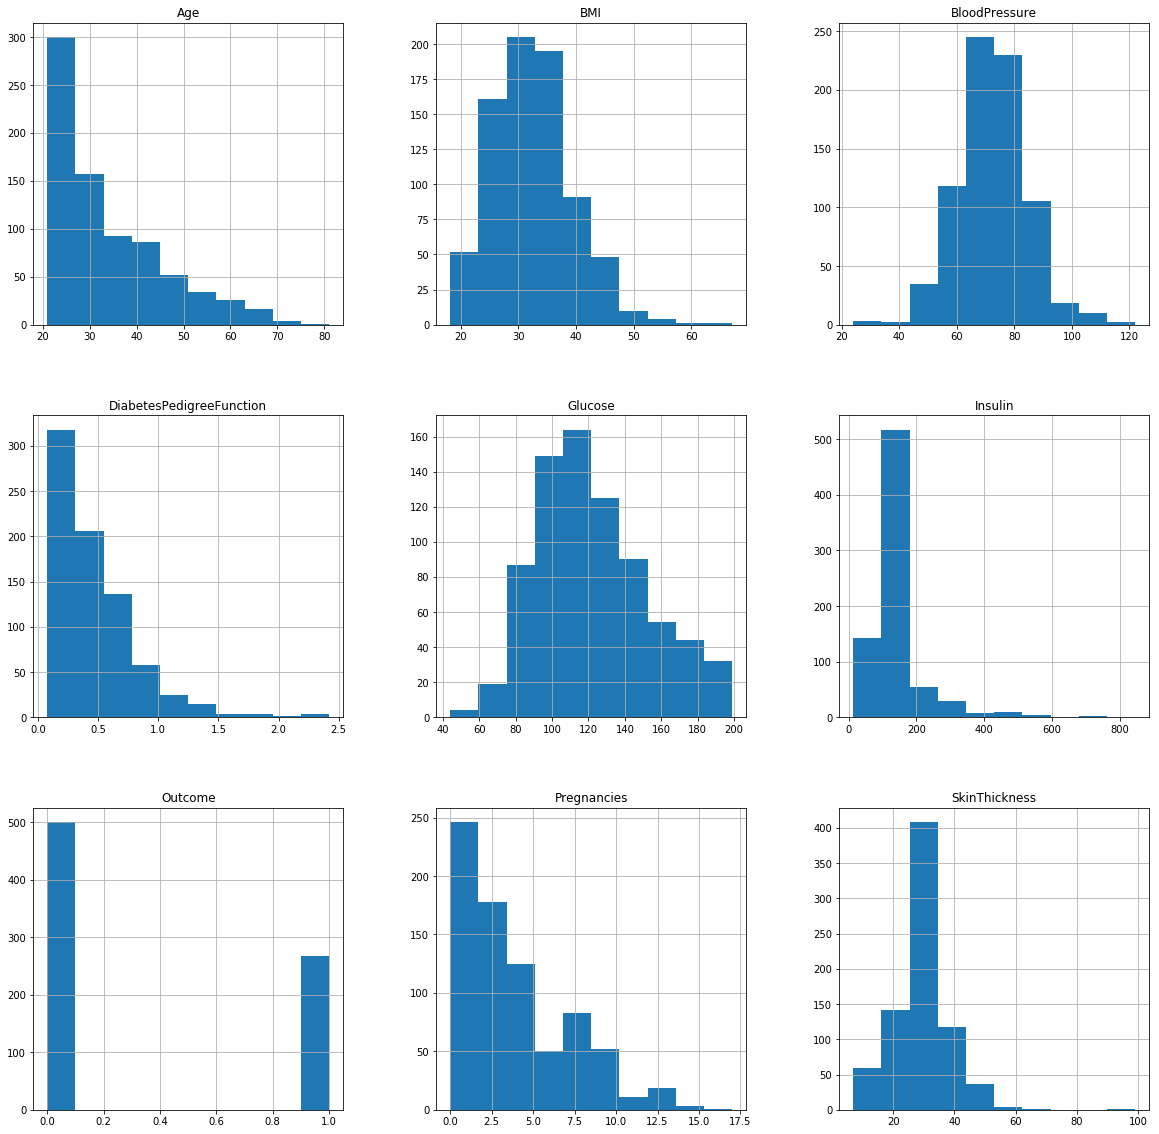

In [743]:
# Histogram
pimadiabetes.hist(figsize = (20,20))

1. Age, DiabetisPedigreeFunction are parameters that are left skewed.  Insulin doesnot seem to be left skewed after replacing zero with median values

2. Glucose parameter almost has a normal distribution


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

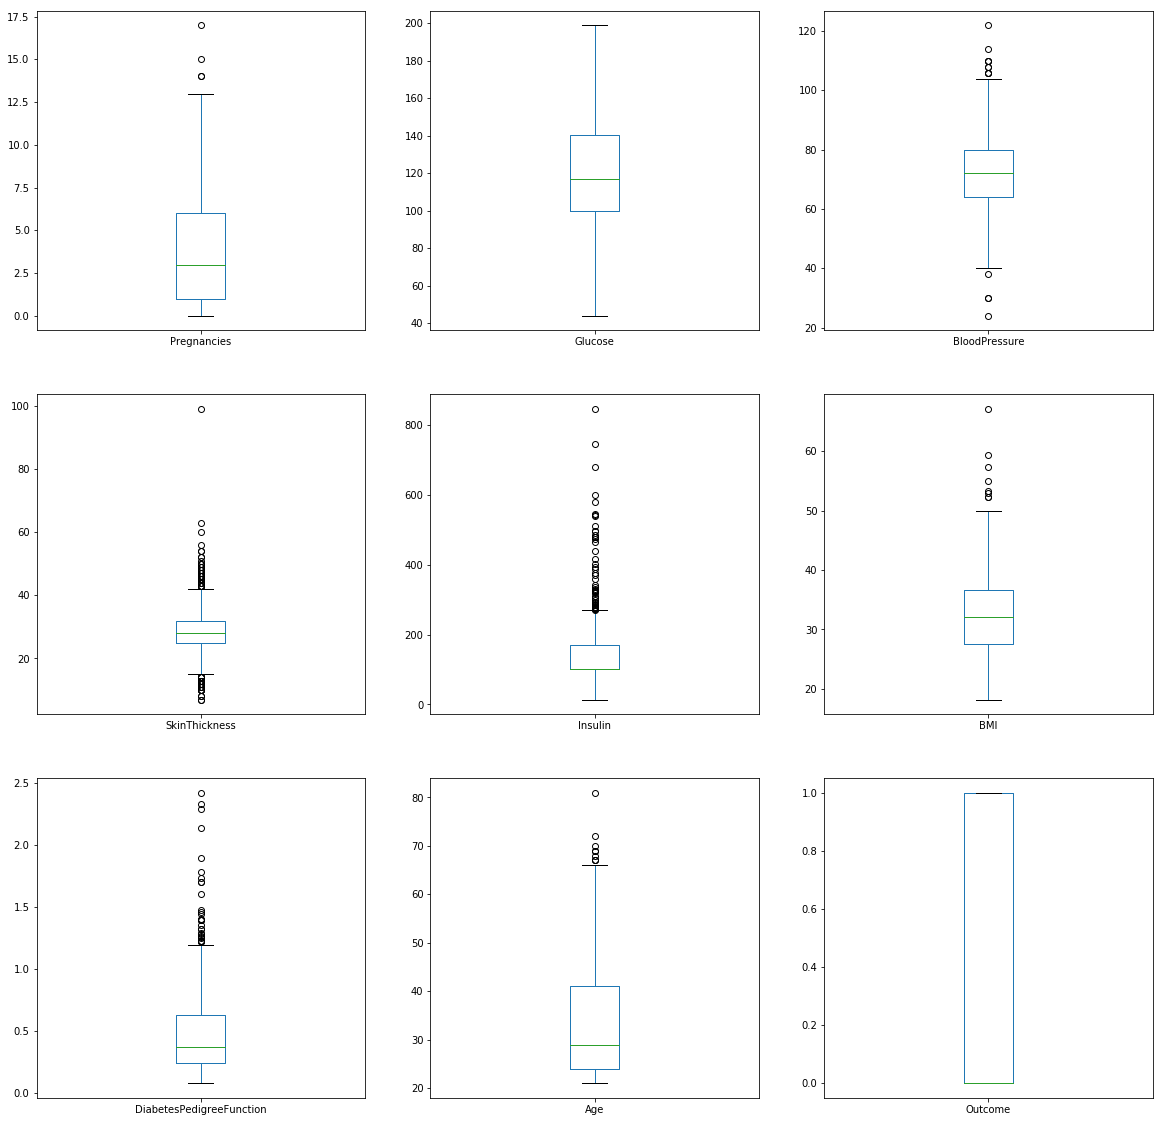

In [744]:
#Boxplot for the refined data
pimadiabetes.plot(kind = 'box',figsize = (20,20), subplots = True, layout = (3,3))

1.  Glucose value doesnot have an Outlier
2.  Insulin, DiabetesPedigreeFunction and SkinThicknesss are having many outliers, in which SkinThickness has outliers
    both at lower and higher value side


# 2. Bivariate analysis

Plotting all the continous variables against the target variable

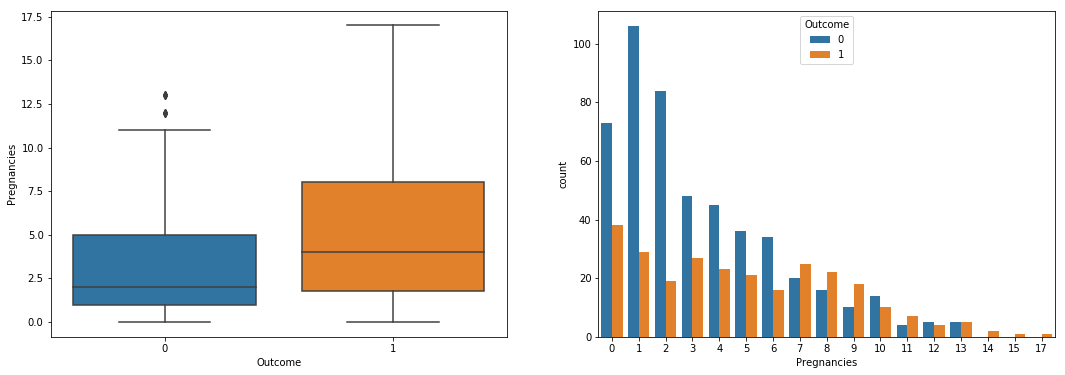

In [745]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=pimadiabetes, ax=axes[0])
sns.countplot(pimadiabetes['Pregnancies'], hue = pimadiabetes['Outcome'], ax=axes[1])

The mean of the women who are diabetic is more than that of non-diabetic as can be seen in the histogram also.  

Comparison of various parameters by dividing data into different age groups

In [746]:
pimadiabetes['age_group'] = pd.cut(pimadiabetes['Age'], range(0, 100, 10))

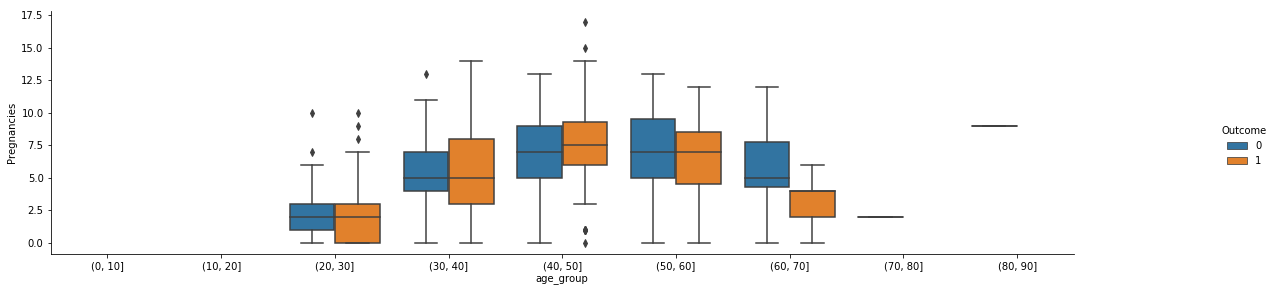

In [747]:

g = sns.catplot(x="age_group", y="Pregnancies", hue="Outcome",
               data=pimadiabetes, kind="box"
              )
g.fig.set_figheight(4)
g.fig.set_figwidth(20)

Women with age between 30 - 60 years of age are prone to diabetic and it seems the distribution is also normal

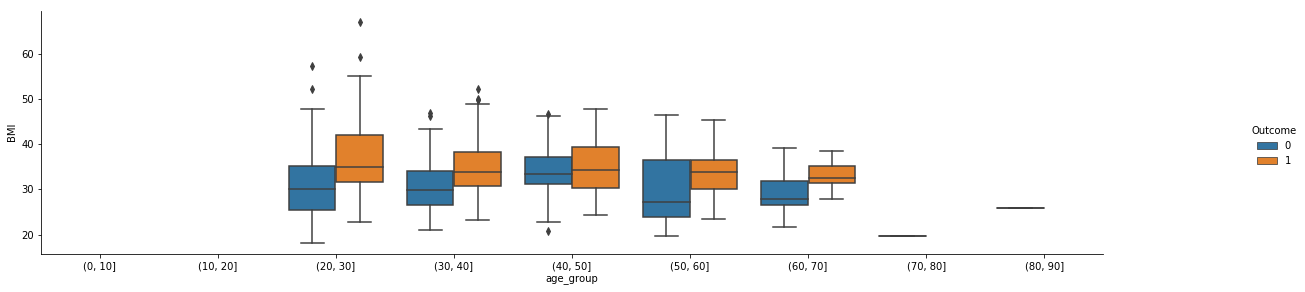

In [748]:

g = sns.catplot(x="age_group", y="BMI", hue="Outcome",
               data=pimadiabetes, kind="box"
              )
g.fig.set_figheight(4)
g.fig.set_figwidth(20)

BMI variation doesnot seem to depend on age group

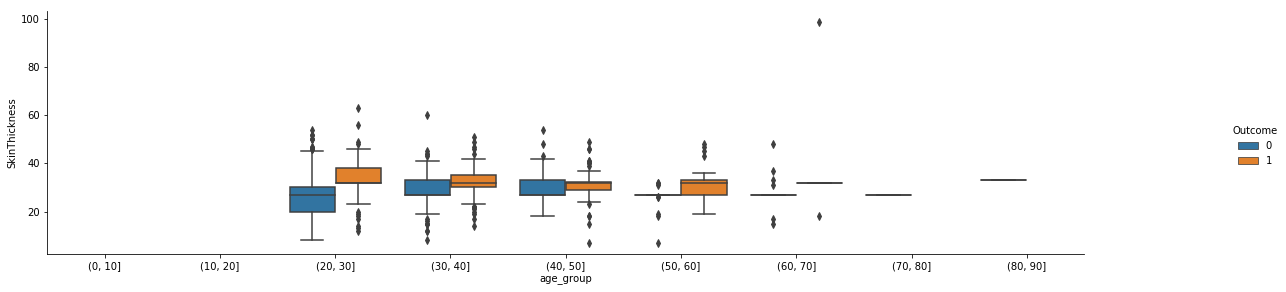

In [749]:

g = sns.catplot(x="age_group", y="SkinThickness", hue="Outcome",
               data=pimadiabetes, kind="box"
              )
g.fig.set_figheight(4)
g.fig.set_figwidth(20)

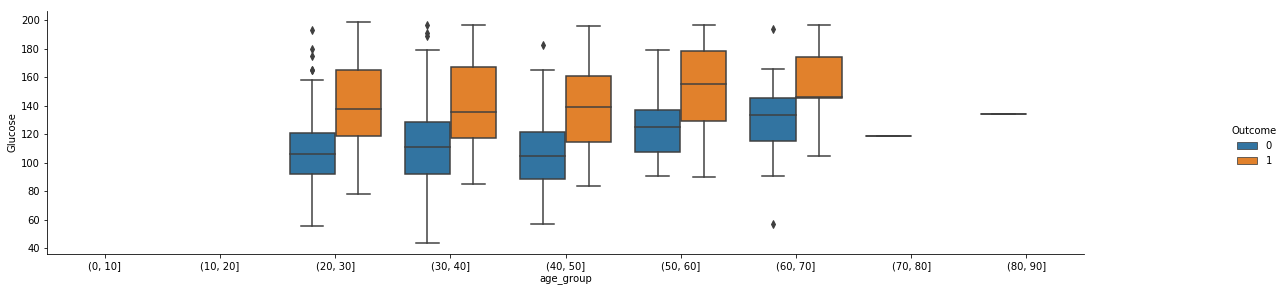

In [750]:

g = sns.catplot(x="age_group", y="Glucose", hue="Outcome",
               data=pimadiabetes, kind="box"
              )
g.fig.set_figheight(4)
g.fig.set_figwidth(20)

# Normalization of all numerical columns

In [751]:
#For processing of data
from sklearn import preprocessing

In [752]:
# Normalization of all numerical columns

# Normalize Pregnancies column
x_array = np.array(pimadiabetes['Pregnancies'])
norm_Pregnancies = preprocessing.normalize([x_array])

# Normalize Glucose column
x_array1 = np.array(pimadiabetes['Glucose'])
norm_Glucose = preprocessing.normalize([x_array1])

# Normalize BloodPressure column
x_array2 = np.array(pimadiabetes['BloodPressure'])
norm_BloodPressure = preprocessing.normalize([x_array2])

# Normalize Skinthickness column
x_array3 = np.array(pimadiabetes['SkinThickness'])
norm_SkinThickness = preprocessing.normalize([x_array3])

# Normalize Insulin column
x_array4 = np.array(pimadiabetes['Insulin'])
norm_Insulin = preprocessing.normalize([x_array4])

# Normalize BMI column
x_array5 = np.array(pimadiabetes['BMI'])
norm_BMI = preprocessing.normalize([x_array5])

# Normalize DiabeticPedigreeFunction column
x_array6 = np.array(pimadiabetes['DiabetesPedigreeFunction'])
norm_DiabeticPedigreeFunc = preprocessing.normalize([x_array6])

# Normalize Age column
x_array7 = np.array(pimadiabetes['Age'])
norm_Age = preprocessing.normalize([x_array7])

# Outcome Variable
x_array8 = np.array(pimadiabetes['Outcome'])

In [753]:
#Preparing Normalized Dataset
pimadiabetes_norm = pd.DataFrame({'Pregnancies':norm_Pregnancies[0,:],
                            'Glucose':norm_Glucose[0,:],
                            'BloodPressure':norm_BloodPressure[0,:],
                            'SkinThickness':norm_SkinThickness[0,:],
                            'Insulin':norm_Insulin[0,:],
                            'BMI':norm_BMI[0,:],
                            'DiabetesPedigreeFunction':norm_DiabeticPedigreeFunc[0,:],
                            'Age':norm_Age[0,:],
                            'Outcome':x_array8
                            })

pimadiabetes_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.04236,0.042578,0.035399,0.041522,0.036537,0.036568,0.039248,0.051173,1
1,0.00706,0.024454,0.032449,0.034404,0.022095,0.028950,0.021971,0.031727,0
2,0.05648,0.052647,0.031466,0.037963,0.036537,0.025358,0.042065,0.032751,1
3,0.00706,0.025604,0.032449,0.027286,0.020262,0.030582,0.010454,0.021493,0
4,0.00000,0.039414,0.019666,0.041522,0.036214,0.046907,0.143222,0.033774,1


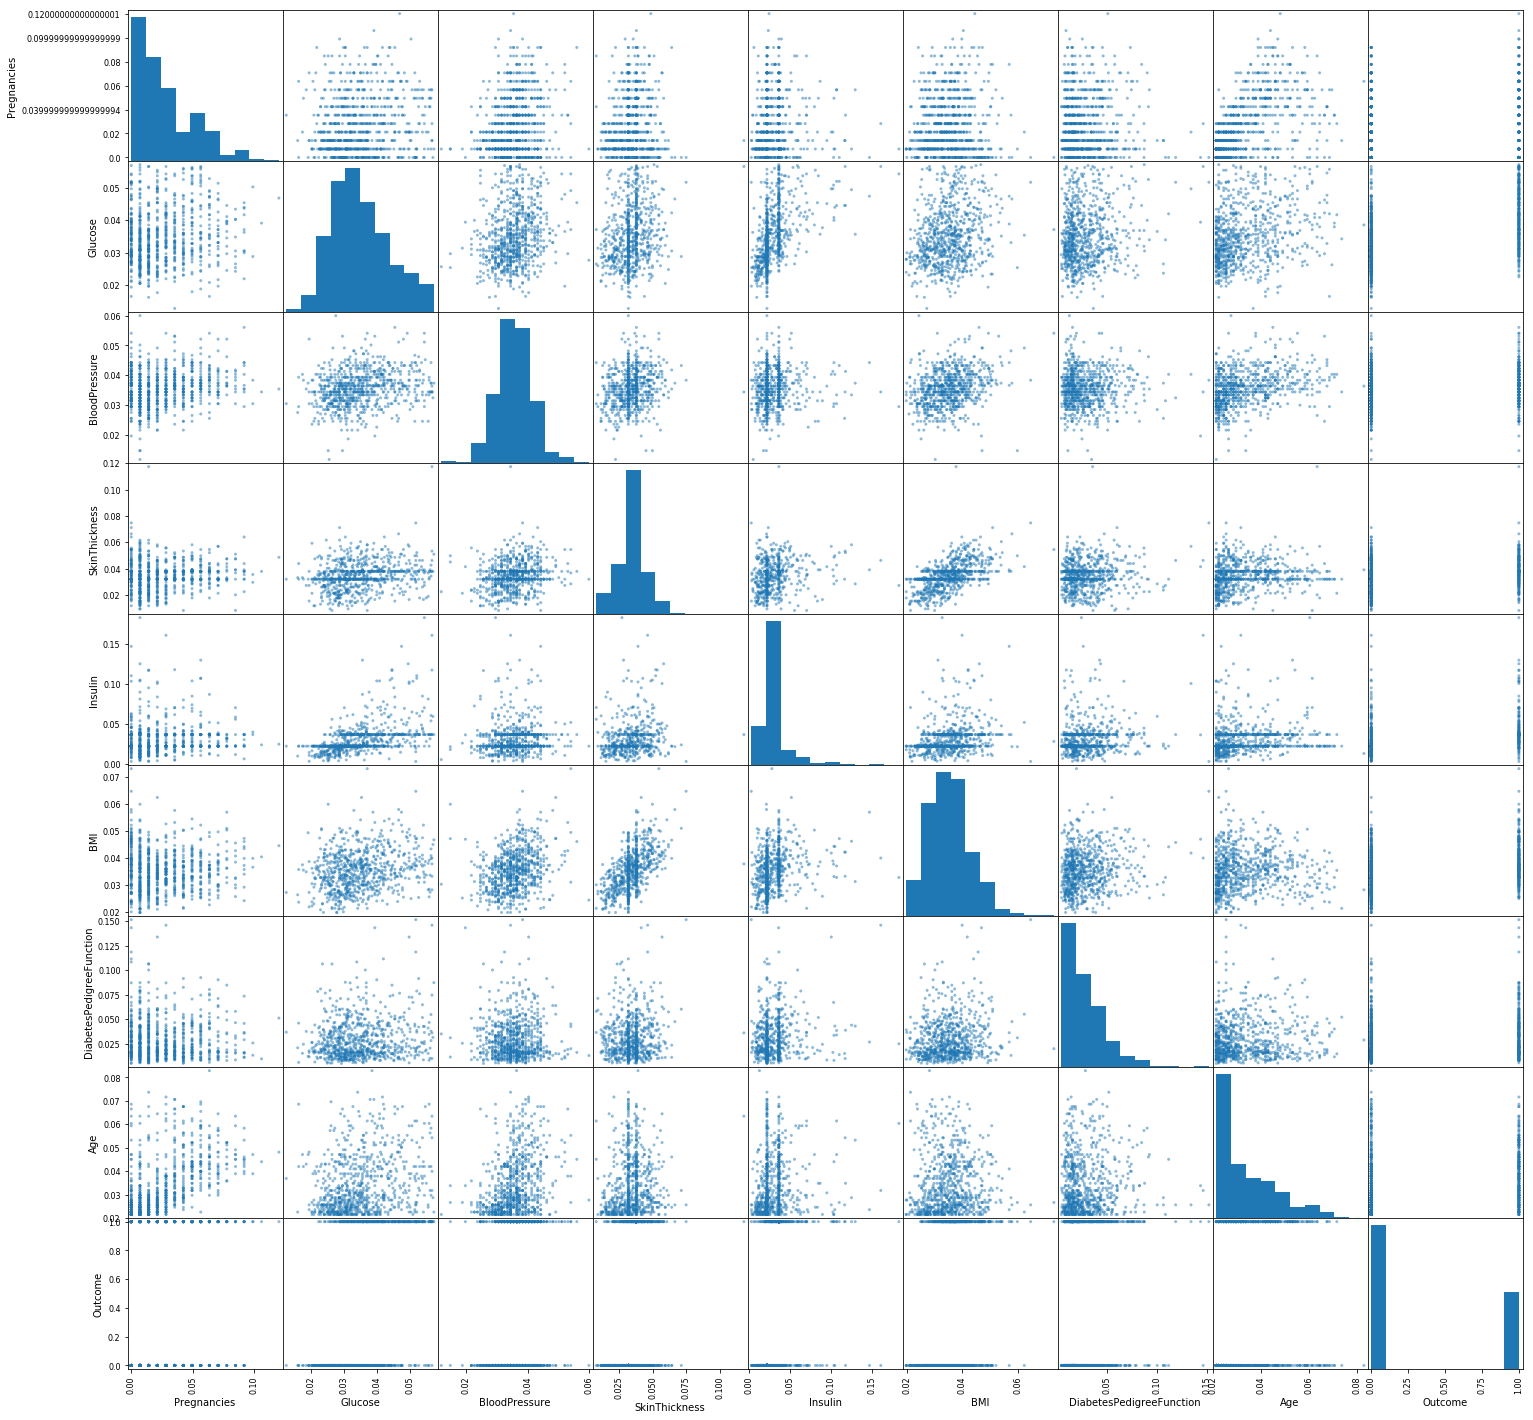

In [754]:
# To get a view of how the  variable are scattered with respect to each other scatter matrix is drawn
from pandas.tools.plotting import scatter_matrix
p = scatter_matrix(pimadiabetes_norm, figsize = (25,25))

In [755]:
corr = pimadiabetes_norm.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


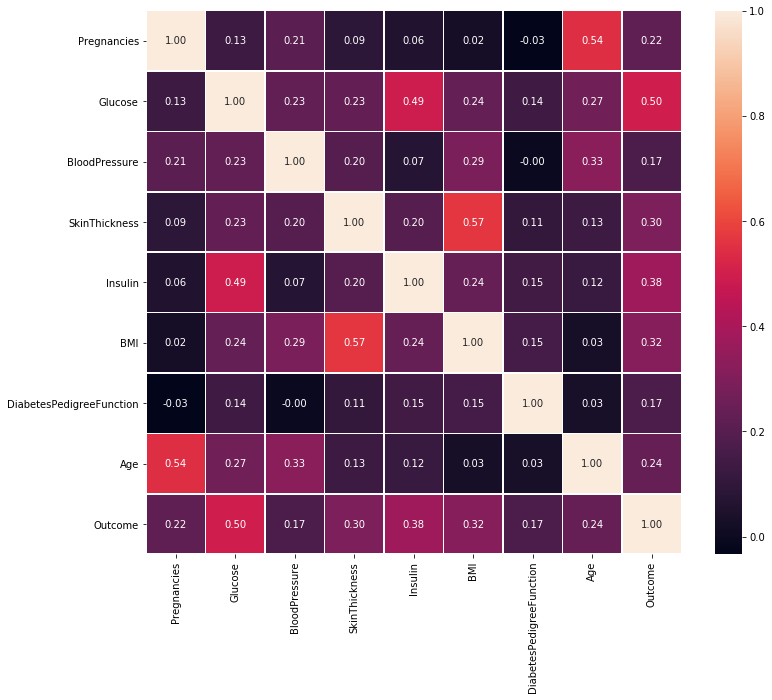

In [756]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot = True,linewidth = 0.5,fmt = '.2f')

The maximum value of correilation in the heatmap is 0.54, which is not an healthy correlation to say the variables are redundant. 

In [757]:
#To split the data into train and test data set
from sklearn.model_selection import train_test_split

# To model Gaussian Naive Bayers classifier
from sklearn.naive_bayes import GaussianNB

#To check the accuracy of the model
from sklearn.metrics import accuracy_score

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# for prepartation of classification report
from sklearn.metrics import classification_report



# ITERATION 1

DATA SLICING

In [758]:
X = pimadiabetes.iloc[:,:8]
y = pimadiabetes.iloc[:,8]

In [759]:
# Split the data into train and test data
# Train data is 70%
# Test data us 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.45, random_state= 1000 )


In [760]:
#implement Gausian Naive Baye's
clf = GaussianNB()


In [761]:
#Fitting GaussianNB into test data set
clf.fit(X_train, y_train, sample_weight = None)

GaussianNB(priors=None, var_smoothing=1e-09)

In [762]:
#Predicting test and train data using gaussian function
y_predict_test1 = clf.predict(X_test)
y_predict_train1 = clf.predict(X_train)

In [763]:
#Accuracy of test data set
accuracy_score(y_test,y_predict_test1,normalize = True)

0.7658959537572254

In [764]:
#Accuracy of train data set
accuracy_score(y_train,y_predict_train1,normalize = True)

0.7843601895734598

In [765]:
#Confusion matrix for the test data set
cm_test1 = confusion_matrix(y_test, y_predict_test1)
cm_test1

array([[185,  39],
       [ 42,  80]], dtype=int64)

In [766]:
# Confusion matrix for the train data set
cm_train1 = confusion_matrix(y_train,y_predict_train1)
cm_train1

array([[238,  38],
       [ 53,  93]], dtype=int64)

In [767]:
print(classification_report(y_test, y_predict_test1))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       224
           1       0.67      0.66      0.66       122

   micro avg       0.77      0.77      0.77       346
   macro avg       0.74      0.74      0.74       346
weighted avg       0.76      0.77      0.77       346



In [768]:
print(classification_report(y_train,y_predict_train1))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       276
           1       0.71      0.64      0.67       146

   micro avg       0.78      0.78      0.78       422
   macro avg       0.76      0.75      0.76       422
weighted avg       0.78      0.78      0.78       422



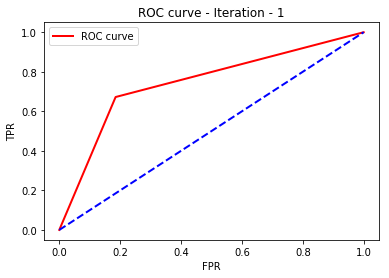

In [769]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_predict_test1,y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Iteration - 1')
plt.legend()
plt.show()

# ITERATION 2: WITH NORMALIZED AND STANDARDIZED DATA

In [770]:
X_features = pimadiabetes_norm.iloc[:,:8]
y = pimadiabetes_norm.iloc[:,8]

In [771]:
# Standardization

from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

X = pd.DataFrame(data = rescaledX, columns= X_features.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [772]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.45, random_state = 1000)

In [773]:
clf = GaussianNB()

In [774]:
clf.fit(X_train, y_train, sample_weight = None)

GaussianNB(priors=None, var_smoothing=1e-09)

In [775]:
#Predicting test and train data using gaussian function
y_predict_test2 = clf.predict(X_test)
y_predict_train2 = clf.predict(X_train)

In [776]:
#Accuracy for test data
accuracy_score(y_test,y_predict_test2, normalize = True)

0.7658959537572254

In [777]:
#Accuracy for train data
accuracy_score(y_train,y_predict_train2,normalize = True)

0.7843601895734598

In [778]:
#Confusion matrix for the test data set
cm_test2 = confusion_matrix(y_test, y_predict_test2)
cm_test2

array([[185,  39],
       [ 42,  80]], dtype=int64)

In [779]:
# Confusion matrix for the train data set
cm_train2 = confusion_matrix(y_train,y_predict_train2)
cm_train2

array([[238,  38],
       [ 53,  93]], dtype=int64)

In [780]:
#Classification report for test data
print(classification_report(y_test, y_predict_test1))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       224
           1       0.67      0.66      0.66       122

   micro avg       0.77      0.77      0.77       346
   macro avg       0.74      0.74      0.74       346
weighted avg       0.76      0.77      0.77       346



In [781]:
#Classification report for test data
print(classification_report(y_train, y_predict_train1))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       276
           1       0.71      0.64      0.67       146

   micro avg       0.78      0.78      0.78       422
   macro avg       0.76      0.75      0.76       422
weighted avg       0.78      0.78      0.78       422



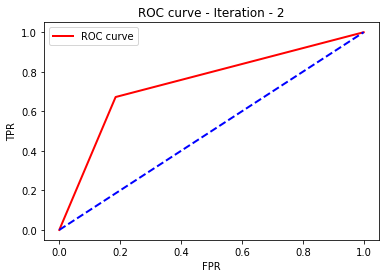

In [782]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_predict_test2,y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Iteration - 2')
plt.legend()
plt.show()

There is no much effect on normalizing and standardizing the data before applying the Gaussian Naive Baye's algoithim

# ITERATION 3




In [783]:
# As Age and Pregency has correlation of 0.54, SkinThickness and BMI has correlation of 0.57 we will take only one variable
# out of these two sets.  BMI is choosen as it has less number of null values

X_features = pd.DataFrame(data = pimadiabetes_norm, columns =  ['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_features.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.042578,0.035399,0.036537,0.036568,0.039248,0.051173
1,0.024454,0.032449,0.022095,0.028950,0.021971,0.031727
2,0.052647,0.031466,0.036537,0.025358,0.042065,0.032751
3,0.025604,0.032449,0.020262,0.030582,0.010454,0.021493
4,0.039414,0.019666,0.036214,0.046907,0.143222,0.033774


In [784]:
y = pimadiabetes_norm.iloc[:,8]


In [785]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.45, random_state = 1000 )


In [786]:
clf = GaussianNB()

In [787]:
clf.fit(X_train, y_train, sample_weight = None)

GaussianNB(priors=None, var_smoothing=1e-09)

In [788]:
# Predicting the test and train data set using the GaussianNB classifier
y_predict_test3 = clf.predict(X_test)
y_predict_train3 = clf.predict(X_train)

In [789]:
# Accuracy of test data by GaussianNB Classifier
accuracy_score(y_test, y_predict_test3, normalize = True)

0.7658959537572254

In [790]:
# Accuracy of training data by Gaussian Classifier
accuracy_score(y_train, y_predict_train3, normalize = True)

0.7843601895734598

In [791]:
#Confusion matrix for the test data
cm_test3 = confusion_matrix(y_test, y_predict_test3)
cm_test3

array([[185,  39],
       [ 42,  80]], dtype=int64)

In [792]:
#Confusin matrix for the train data
cm_train3 = confusion_matrix(y_train, y_predict_train3)
cm_train3

array([[238,  38],
       [ 53,  93]], dtype=int64)

In [793]:
# Classification report for the test data
print(classification_report(y_test, y_predict_test3))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       224
           1       0.67      0.66      0.66       122

   micro avg       0.77      0.77      0.77       346
   macro avg       0.74      0.74      0.74       346
weighted avg       0.76      0.77      0.77       346



In [794]:
#Classification report for the train data
print(classification_report(y_train, y_predict_train3))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       276
           1       0.71      0.64      0.67       146

   micro avg       0.78      0.78      0.78       422
   macro avg       0.76      0.75      0.76       422
weighted avg       0.78      0.78      0.78       422



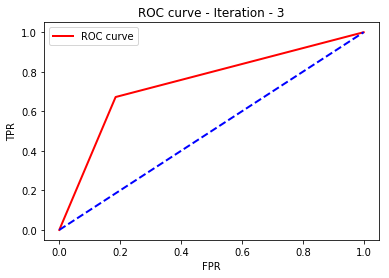

In [795]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_predict_test3,y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Iteration - 3')
plt.legend()
plt.show()

# ITERATION 4

In [796]:
# As Age and Pregency has correlation of 0.54, SkinThickness and BMI has correlation of 0.57 we will take only one variable
# out of these two sets.  BMI is choosen as it has less number of null values

X_features = pd.DataFrame(data = pimadiabetes_norm, columns =  ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_features.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.04236,0.042578,0.035399,0.036537,0.036568,0.039248,0.051173
1,0.00706,0.024454,0.032449,0.022095,0.028950,0.021971,0.031727
2,0.05648,0.052647,0.031466,0.036537,0.025358,0.042065,0.032751
3,0.00706,0.025604,0.032449,0.020262,0.030582,0.010454,0.021493
4,0.00000,0.039414,0.019666,0.036214,0.046907,0.143222,0.033774


In [797]:
y = pimadiabetes_norm.iloc[:,8]


In [798]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.45,random_state = 1000 )


In [799]:
clf = GaussianNB()

In [800]:
clf.fit(X_train, y_train, sample_weight = None)

GaussianNB(priors=None, var_smoothing=1e-09)

In [801]:
# Predicting the test and train data set using the GaussianNB classifier
y_predict_test4 = clf.predict(X_test)
y_predict_train4 = clf.predict(X_train)

In [802]:
# Accuracy of test data by GaussianNB Classifier
accuracy_score(y_test, y_predict_test4, normalize = True)

0.7658959537572254

In [803]:
# Accuracy of training data by Gaussian Classifier
accuracy_score(y_train, y_predict_train4, normalize = True)

0.7843601895734598

In [804]:
#Confusion matrix for the test data
cm_test4 = confusion_matrix(y_test, y_predict_test4)
cm_test4

array([[185,  39],
       [ 42,  80]], dtype=int64)

In [805]:
#Confusin matrix for the train data
cm_train4 = confusion_matrix(y_train, y_predict_train4)
cm_train4

array([[238,  38],
       [ 53,  93]], dtype=int64)

In [806]:
# Classification report for the test data
print(classification_report(y_test, y_predict_test4))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       224
           1       0.67      0.66      0.66       122

   micro avg       0.77      0.77      0.77       346
   macro avg       0.74      0.74      0.74       346
weighted avg       0.76      0.77      0.77       346



In [807]:
#Classification report for the train data
print(classification_report(y_train, y_predict_train4))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       276
           1       0.71      0.64      0.67       146

   micro avg       0.78      0.78      0.78       422
   macro avg       0.76      0.75      0.76       422
weighted avg       0.78      0.78      0.78       422



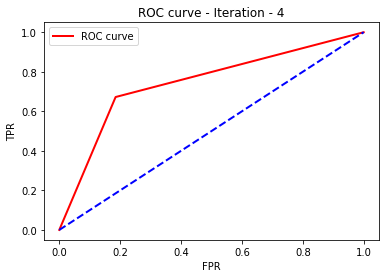

In [808]:


##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_predict_test4,y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Iteration - 4')
plt.legend()
plt.show()

# Conclusions:


 1. The pima indian diabetes dataset has many '0' values which are treated as 'missing' values and replaced with median value calculated after grouping by outcome
 2. Univariate and bivariate analysis is done by scatter plots and boxplots
 3. Plotting of different independent variable with the target variable is done 
 4. The Gaussian Naive Baye's is implemented on the normalized pimadiabetes dataset by standardizing data in one of the iterations.  In another iteration it is done without standardising data.  It was found that there is no differencein the accuracy/recall/precision calcualated.  
 5. The Naive Baye's is implemented by removing one of the two parameters having correlation more than 0.5 i.e., removing SkinThickness and calculated.  Even then the accuracy/recall/precision didnot change.  
 6. The parameters pregnancy and SkinThickness removed and precision/recall/accuracy is calculated.  No change observed using the Gaussian Naive Baye's.  It inidicates that there is no much effect of these parameters on the prediction of class.
 7. The train and test split is selected so that it maximizes the recall value for the diabetic patients and it is found to  be 55/45 ratio for train/test data.
 8. Confusion matrix for both the training and test data is obtained and ROC Curve drawn for test data
 9. The accuracy, Precision, Recall values are as follows
        Accuracy on Test data = 0.7658
        Accuracy on Train data = 0.7843
        Precision for test data for  Non-Diabetic/Diabetic Outcome = 0.81/0.67
        Recall for test data for Non-Diabetic/Diabetic Outcome = 0.83/0.66

